# Introduction to Exploratory Data Analysis


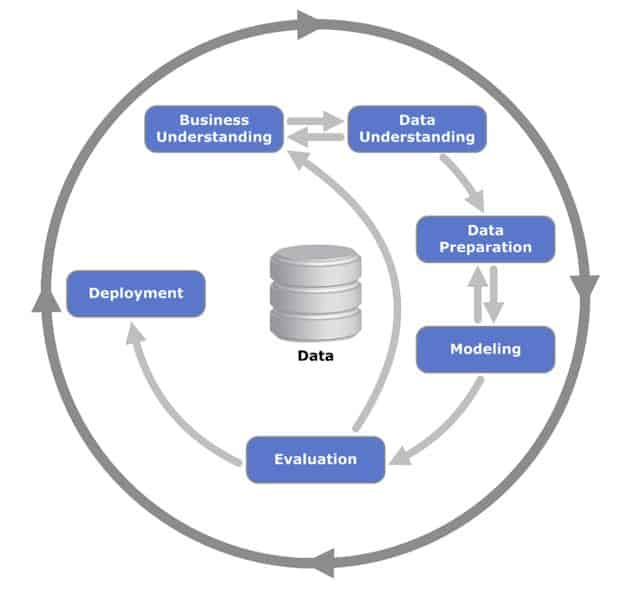

Exploratory Data Analysis is a process to perform initial investigations on a data set so as to discover patterns, spot anomalies or validate assumptions.

In this process, an analyst relies on summary statistics and visualizations. 

Important skills for conducting EDA with python include knowledge of python scripting, pandas and visualizations using matplotlib and/or seaborn

In [6]:
#import the libaries to work with
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Set
The data set for this exercise is obtained online from the UCI machine learning repository. Click [here](https://archive-beta.ics.uci.edu/ml/datasets/online+retail) to visit the download page.

It is described as a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [8]:
#load the data set

#data = pd.read_excel('OnlineRetail.xlsx', index_col=0, sheet_name='Online Retail')

#for the purpose of this class I saved the data as csv so that loading time is faster
data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\ML Notebooks\OnlineRetail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


## Understand the data
An introductory step is to look at the content of the data to get an idea of what you're going to be dealing with

In [9]:
#view the shape of the data
#DataFrame.shape tells you the number of rows and columns contained in the dataframe
data.shape

(541909, 8)

In [10]:
#check the head of the data
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [11]:
#check the tail of the data
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [12]:
#view info relating to the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
#there's another way to view data types using dtypes attribute
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [14]:
#if the data set has a large number of columns, you can view the column names by accessing the columns attribute
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
#use list comprehension to make columns upper case if you want
[x.upper() for x in data.columns]

['INVOICENO',
 'STOCKCODE',
 'DESCRIPTION',
 'QUANTITY',
 'INVOICEDATE',
 'UNITPRICE',
 'CUSTOMERID',
 'COUNTRY']

In [16]:
#loop through each column name

#Your code here
for a in data.columns:
    print(a)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


In [17]:
#view summary statistics with describe() method
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
#why negative qunatity?
#--maybe loss?
#--maybe purchase?

In [19]:
'''#maybe due to the number of goods displaced, stolen or damaged
#maybe a returned goods after purchase with a refund of payment made
#maybe as result of negative pricing; when a demand for a product drops or supply increases to an extent that the owners
or suppliers are prepared to pay others to accept it, in effect setting the price to a negative. This can happen because
its cost money to transport, store, and dispose of a product even when there is little demand to buy it
#'''

'#maybe due to the number of goods displaced, stolen or damaged\n#maybe a returned goods after purchase with a refund of payment made\n#maybe as result of negative pricing; when a demand for a product drops or supply increases to an extent that the owners\nor suppliers are prepared to pay others to accept it, in effect setting the price to a negative. This can happen because\nits cost money to transport, store, and dispose of a product even when there is little demand to buy it\n#'

## Cleaning and Manipulation

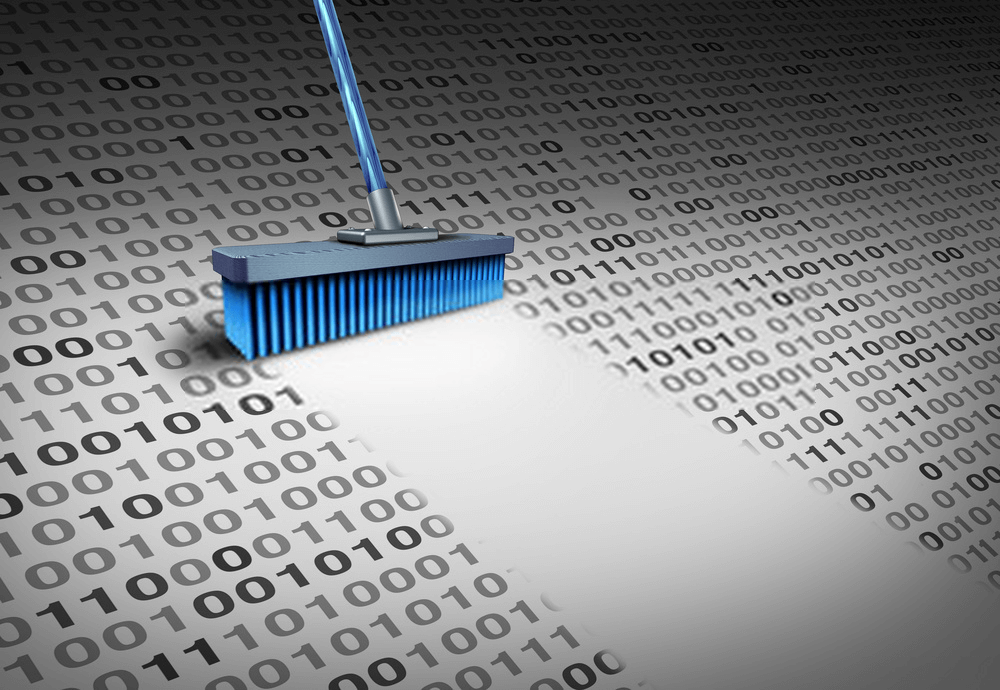

You may choose to delete rows or columns, modify content such as filling in empty values, etc

**Why clean your data?**

* Prevents time wastage
* Makes your analysis run faster
* You avoid making bad conclusions


**Broad Overview of Cleaning Steps**
* Handle empty values: you can delete them, fill them with a value that makes sense
* Check for data consistency: case may be important for strings, formatting, etc
* Handle outliers
* Remove duplicates
* Validate correctness of entries: age columns shouldn't contain text, for instance

In [20]:
#check for missing data using isna().sum()
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
#what do the records with empty customer ID mean? Does it mean the sale was not recorded to a customer? 
#TODO: filter the dataframe using CustomerID.isna() as filter condition
data[data.CustomerID.isna()]

'''its either means that the sales was not recorded to a customer or somebody else[a new customer] carried out the sales  '''

'its either means that the sales was not recorded to a customer or somebody else[a new customer] carried out the sales  '

In [22]:
data[data.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


Question: what is the result of DataFrame.CustomerID.isna() as a mask? Is is a boolean or a dataframe?

In [23]:
#run the code there
data.CustomerID.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: CustomerID, Length: 541909, dtype: bool

In [24]:
#Your answer here
'''it is a boolean'''

'it is a boolean'

In [25]:
#what about records with empty descriptions? Use Description.isna()
data[data.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


#### TODO: return rows where both description and customerID are null

> Your code should look like `df[df.Col1.isna() & df.Col2.isna()]`



In [26]:
#your code here

data[data.Description.isna() & data.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


#### How many unique stock codes have no description?

> One option is to run code like this: `len(data[data.Description.isna()].StockCode.unique())`
> The code uses the `unique()` method to fetch an array of unique stock codes. The we use the `len()` function to calculate the length of the array

In [27]:
#Run the code from the description above here
len(data[data.Description.isna()].StockCode.unique())

960

In [28]:
#is your answer 960?
#-yes

#### TODO: now use `nunique()` to count number of unique stock codes that have no description

> Your code should look like `df[df.description_column_name.isna()].stock_code_column_name.nunique()`

In [29]:
#TODO: now use nunique() to count number of unique stock codes that have no description

data[data.Description.isna()].StockCode.nunique()

960

#### What countries have sales with no description? 
>Use `value_counts()` on the filtered dataframe to count countries.

>Your code should look like `df[df.description_column_name.isna()].country_column_name.value_counts()`

In [30]:
#your code here
data[data.Description.isna()].Country.value_counts()

United Kingdom    1454
Name: Country, dtype: int64

**Was it the United Kingdom?**

In [31]:
#-Yes

#### TODO: What countries have sales with no customer ID and how many records are affected?

> Your code should look like `df[df.customer_id_column.isna()].country_column.value_counts()`

In [32]:
#your code here


data[data.CustomerID.isna()].Country.value_counts()

United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

Assuming you don't want to keep records that have no description, you can choose to delete those rows.

In [33]:
#check number of records that will be deleted


print('Total number of records: ',data.shape[0])
print('Number of records with missing description: ',data[data.Description.isna()].shape[0])
print('Number of records without missing description: ',data[data.Description.notna()].shape[0])

Total number of records:  541909
Number of records with missing description:  1454
Number of records without missing description:  540455


In [34]:
#number of rows with missing descriptions
num_missing = data[data.Description.isna()].shape[0]

#number of rows in all the data set
num_all = data.shape[0]

#percentage of rows with missing description
(num_missing/num_all) * 100

0.2683107311375157

In [35]:
#number of rows with missing descriptions
num_missing = data[data.Description.isna()].shape[0]
num_missing

1454

In [36]:
#number of rows in all the data set
num_all = data.shape[0]
num_all

541909

In [37]:
#percentage of rows with missing description
percent_row = (num_missing/num_all) * 100
percent_row

0.2683107311375157

In [38]:
#one easy way to do this is to use notna() to select records that are not NaN

data_clean_desc = data[data.Description.notna()]
data_clean_desc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [39]:
#what are the rows with NaN values
data_clean_desc.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

#### What are other cleaning activities you can do?
* Replace values e.g. replace EIRE or RSA with a more easily recognizable name



In [40]:
data_clean_desc.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [41]:
#find records where country is EIRE
data_clean_desc[data_clean_desc.Country=='EIRE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,12/1/2010 14:05,9.95,14911.0,EIRE
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,12/1/2010 14:05,2.95,14911.0,EIRE
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,12/1/2010 14:05,2.55,14911.0,EIRE
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,12/1/2010 14:05,0.85,14911.0,EIRE
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,12/1/2010 14:05,2.25,14911.0,EIRE
...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,12/8/2011 15:54,8.50,14911.0,EIRE
539152,581433,48187,DOORMAT NEW ENGLAND,2,12/8/2011 15:54,8.25,14911.0,EIRE
539153,581433,48184,DOORMAT ENGLISH ROSE,2,12/8/2011 15:54,8.25,14911.0,EIRE
539154,581433,20685,DOORMAT RED RETROSPOT,2,12/8/2011 15:54,8.25,14911.0,EIRE


In [42]:
#select the country column from the filtered dataframe

data_clean_desc[data_clean_desc.Country=='EIRE'].Country

1404      EIRE
1405      EIRE
1406      EIRE
1407      EIRE
1408      EIRE
          ... 
539151    EIRE
539152    EIRE
539153    EIRE
539154    EIRE
539155    EIRE
Name: Country, Length: 8196, dtype: object

In [43]:
#let's see what the replace operation will do. Use Country.replace() in your syntax
#it will find 'EIRE' and replace with 'Ireland'

data_clean_desc[data_clean_desc.Country=='EIRE'].Country.replace('EIRE','Ireland')

1404      Ireland
1405      Ireland
1406      Ireland
1407      Ireland
1408      Ireland
           ...   
539151    Ireland
539152    Ireland
539153    Ireland
539154    Ireland
539155    Ireland
Name: Country, Length: 8196, dtype: object

In [44]:
#apply the replace operation
data_clean_desc['Country'] = data_clean_desc.Country.replace('EIRE','Ireland')
data_clean_desc['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 540455, dtype: object

In [45]:
#data_clean_desc.loc[:,'Country'] = data_clean_desc.Country.replace('EIRE','Ireland')

In [46]:
data_clean_desc.loc[:,'Country'] = data_clean_desc.Country.replace('EIRE','Ireland')

In [47]:
#check what you have done. do we now have rows with 'Ireland'?
data_clean_desc[data_clean_desc.Country=='Ireland'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,12/1/2010 14:05,9.95,14911.0,Ireland
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,12/1/2010 14:05,2.95,14911.0,Ireland
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,12/1/2010 14:05,2.55,14911.0,Ireland
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,12/1/2010 14:05,0.85,14911.0,Ireland
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,12/1/2010 14:05,2.25,14911.0,Ireland


In [48]:
#do we still have EIRE?
data_clean_desc[data_clean_desc.Country=='EIRE'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [49]:
#-No EIRE

### Replace Missing Customer IDs

In [50]:
#run value counts on customer id column to get a general idea of what counts are
data_clean_desc.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [51]:
#run the code in the next line to see one way conversion can be done from float to string
#notice that we first convert to int64 to drop the decimals before converting to string

#data_clean_desc.CustomerID.astype('Int64').astype(str)

In [52]:

data_clean_desc.CustomerID.astype('Int64').astype(str)

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 540455, dtype: object

#### let's replace NaN CustomerID with 'Unidentified'

In [53]:
#recall the data type of CustomerID here was originally float. We need to convert that to string
#in order to replace with 'Unidentified', we need the column data type to be string.
#i will first convert the float to integer so we drop the decimals, then convert to string

data_clean_desc['CustomerID'] = data_clean_desc.CustomerID.astype('Int64').astype('str')

In [54]:
data_clean_desc.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [55]:
#check missing records
data_clean_desc.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [56]:
#how come there are no longer any missing customer IDs after conversion?
#TODO: use value_counts() to group customer ID and show count per customer ID
#It will show us what the nulls have been converted to an integer

data_clean_desc.CustomerID.value_counts()

<NA>     133626
17841      7983
14911      5903
14096      5128
12748      4642
          ...  
13270         1
17763         1
17291         1
15668         1
15562         1
Name: CustomerID, Length: 4373, dtype: int64

In [57]:
# we found that NaN was now represented as <NA> after it was converted to string using the method above
data_clean_desc[data_clean_desc.CustomerID=='<NA>']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,<NA>,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,<NA>,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,<NA>,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,<NA>,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,<NA>,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,<NA>,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,<NA>,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,<NA>,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,<NA>,United Kingdom


In [58]:
#replace every <NA> with 'Unidentified'
#using the parameter inplace applies the operation

data_clean_desc.CustomerID.replace('<NA>','Unidentified',inplace=True)

In [59]:
#do we still have <NA>?
data_clean_desc[data_clean_desc.CustomerID=='<NA>']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [60]:
'''No <NA> again'''

'No <NA> again'

In [61]:
#do we now have 'Unidentified'?
data_clean_desc[data_clean_desc.CustomerID=='Unidentified']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,Unidentified,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,Unidentified,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,Unidentified,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,Unidentified,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,Unidentified,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,Unidentified,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,Unidentified,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,Unidentified,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,Unidentified,United Kingdom


In [62]:
'''Yes we do have unidentified'''

'Yes we do have unidentified'

In [63]:
#check again with value_counts()
data_clean_desc.CustomerID.value_counts()

Unidentified    133626
17841             7983
14911             5903
14096             5128
12748             4642
                 ...  
13270                1
17763                1
17291                1
15668                1
15562                1
Name: CustomerID, Length: 4373, dtype: int64

In [64]:
data_clean_desc.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Question
Who could these unidentified customers be? Why would people visit an online store and make purchases yet their purchases won't be recorded with a customer ID?

In [65]:
data_clean_desc[data_clean_desc.CustomerID=='Unidentified'].shape[0]/data_clean_desc.shape[0]

0.24724722687365275

#### TODO: replace every 'unidentified' customer ID with an appropriate identifier based on your response to the question above

> Use the examples above to get the correct syntax.

In [66]:


#Your code here
data_clean_desc[data_clean_desc.CustomerID == 'Identifier']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Check what you've done
#### TODO: display the stop few rows of the dataframe. Make sure to filter by the new identifier you have introduced
> Your code should look like `df[df.CustomerID=='identifier']`

In [67]:

#Your code here
data[data.CustomerID == 'Identifier']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## Relationships & Insights

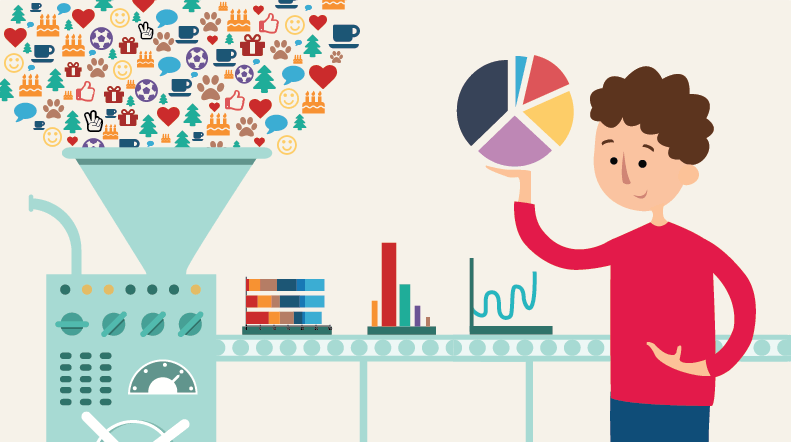

Look at relationships in the data and try to answer basic business questions so as to gain more insights

In [68]:
data_clean_desc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850,United Kingdom


What is the average sale value or purchase value

In [69]:
#let's calculate average sale value
#create a column as unit price * quantity
data_clean_desc['SaleValue'] = data_clean_desc.UnitPrice * data_clean_desc.Quantity

In [70]:
data_clean_desc.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850,United Kingdom,20.34


In [71]:
#what does sale value contain
data_clean_desc['SaleValue'].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: SaleValue, dtype: float64

In [72]:
#average price per sale
data_clean_desc.groupby('InvoiceNo').SaleValue.mean()

InvoiceNo
536365         19.874286
536366         11.100000
536367         23.227500
536368         17.512500
536369         17.850000
               ...      
C581484   -168469.600000
C581490       -16.265000
C581499      -224.690000
C581568       -54.750000
C581569        -3.750000
Name: SaleValue, Length: 24446, dtype: float64

In [73]:
#average sale value overall
data_clean_desc.SaleValue.mean()

18.036187904641775

What is the total sale value by country for the top 10 countries?

In [74]:
#total sales value by country
data_clean_desc.groupby('Country').SaleValue.sum().head(10)

Country
Australia          137077.27
Austria             10154.32
Bahrain               548.40
Belgium             40910.96
Brazil               1143.60
Canada               3666.38
Channel Islands     20086.29
Cyprus              12946.29
Czech Republic        707.72
Denmark             18768.14
Name: SaleValue, dtype: float64

In [75]:
#i want to view the numbers as integers
data_clean_desc.groupby('Country').SaleValue.sum().astype(int)

Country
Australia                137077
Austria                   10154
Bahrain                     548
Belgium                   40910
Brazil                     1143
Canada                     3666
Channel Islands           20086
Cyprus                    12946
Czech Republic              707
Denmark                   18768
European Community         1291
Finland                   22326
France                   197403
Germany                  221698
Greece                     4710
Hong Kong                 10117
Iceland                    4310
Ireland                  263276
Israel                     7907
Italy                     16890
Japan                     35340
Lebanon                    1693
Lithuania                  1661
Malta                      2505
Netherlands              284661
Norway                    35163
Poland                     7213
Portugal                  29367
RSA                        1002
Saudi Arabia                131
Singapore                  9120


In [76]:
#total sales value by country, give me top ten
data_clean_desc.groupby('Country').SaleValue.sum().astype(int).sort_values(ascending = False)

Country
United Kingdom          8187806
Netherlands              284661
Ireland                  263276
Germany                  221698
France                   197403
Australia                137077
Switzerland               56385
Spain                     54774
Belgium                   40910
Sweden                    36595
Japan                     35340
Norway                    35163
Portugal                  29367
Finland                   22326
Channel Islands           20086
Denmark                   18768
Italy                     16890
Cyprus                    12946
Austria                   10154
Hong Kong                 10117
Singapore                  9120
Israel                     7907
Poland                     7213
Unspecified                4749
Greece                     4710
Iceland                    4310
Canada                     3666
Malta                      2505
United Arab Emirates       1902
USA                        1730
Lebanon                    1693


In [77]:
#the data above is not ordered. So order before taking top 10

In [78]:
#Top 10 total sales value by country in descending order
data_clean_desc.groupby('Country').SaleValue.sum().astype(int).sort_values(ascending = False).head(10)

Country
United Kingdom    8187806
Netherlands        284661
Ireland            263276
Germany            221698
France             197403
Australia          137077
Switzerland         56385
Spain               54774
Belgium             40910
Sweden              36595
Name: SaleValue, dtype: int32

What are the distributions of sales and quantities in the data set?

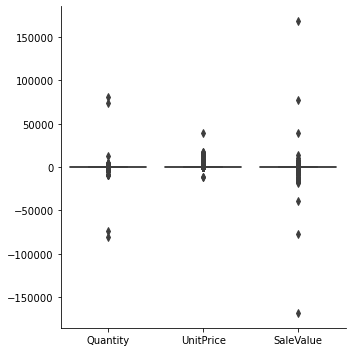

In [79]:
#one way is to use a catplot from the seaborn library and chose box plot in the parameters
sns.catplot(data = data_clean_desc, kind = 'box')

<AxesSubplot:ylabel='SaleValue'>

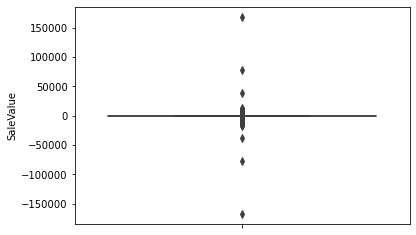

In [80]:
#another way is to individually plot boxplots
sns.boxplot(y=data_clean_desc.SaleValue)

(-25.0, 50.0)

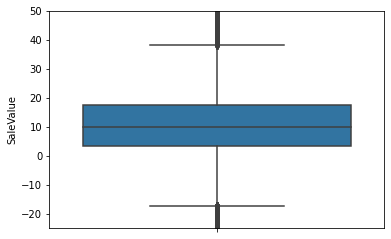

In [81]:
#use xlim() or ylim() from matplotlib to change scale on x or y axis as may be required

sns.boxplot(y=data_clean_desc.SaleValue)
plt.ylim(-25,50)

What does a box plot tell you?

(-25.0, 50.0)

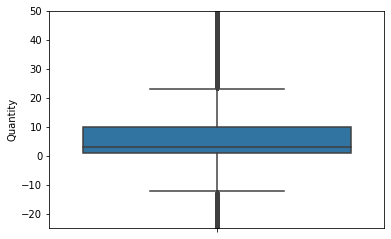

In [82]:
#TODO: make a similar box plot for the quantity column
sns.boxplot(y=data_clean_desc.Quantity)
plt.ylim(-25,50)

(-5000.0, 10000.0)

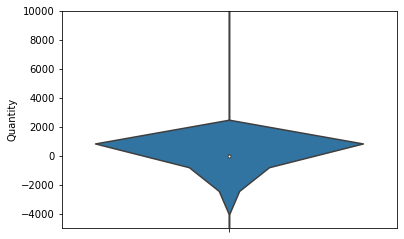

In [83]:
sns.violinplot(y=data_clean_desc.Quantity)
plt.ylim(-5000,10000)

In [84]:
#sns.pairplot(data=data_clean_desc)

What is the total sales quantity by country for the top 10 countries?

In [85]:
#total sales quantities by country
top_sales = data_clean_desc.groupby('Country').Quantity.sum().sort_values(ascending=False)[:10]
top_sales

Country
United Kingdom    4277438
Netherlands        200128
Ireland            142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

Display the top 10 countries by sales quantity in a pie chart or bar chart

In [86]:
#total sales quantities by country
top_ten = data_clean_desc.groupby('Country').Quantity.sum().sort_values(ascending=False)[:10]
top_ten

Country
United Kingdom    4277438
Netherlands        200128
Ireland            142637
Germany            117448
France             110480
Australia           83653
Sweden              35637
Switzerland         30325
Spain               26824
Japan               25218
Name: Quantity, dtype: int64

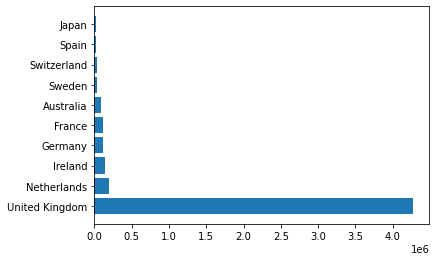

In [87]:
#use horizontal bar chart to visualize top 10
#use the series index as vertical axis and series values as horizontal axis of the barh() plot

plt.barh(y=top_ten.index, width=top_ten)
plt.show()

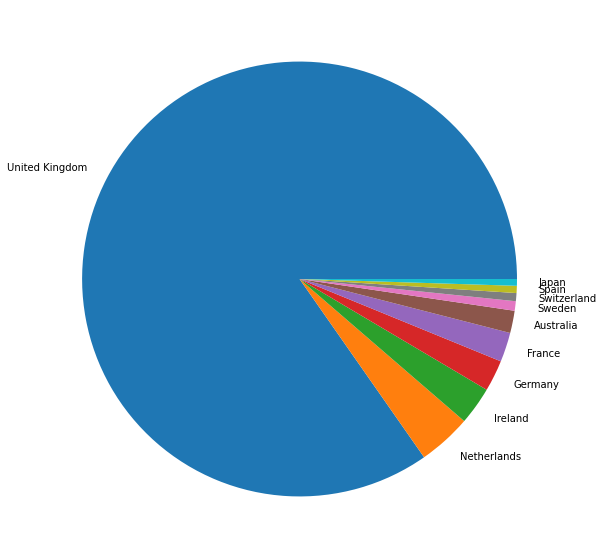

In [88]:
#let's try a pie chart
plt.figure(figsize=(10,10))
plt.pie(top_ten,labels=top_ten.index)
plt.show()

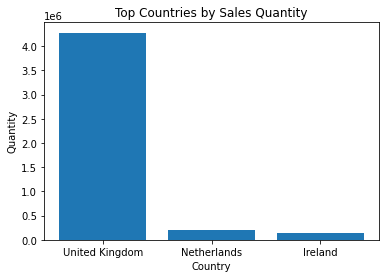

In [89]:
#use vertical bar chart to visualize top 10
plt.bar(x=top_ten.index[:3], height=top_ten[:3])

plt.title('Top Countries by Sales Quantity')
plt.xlabel('Country')
plt.ylabel('Quantity')

plt.show()

In [90]:
#average sales quantity by country
#data_clean_desc.groupby('Country').Quantity.mean().sort_values(ascending=False)

Check sales trend by date

In [91]:
#convert invoice date to datetime
data_clean_desc['InvoiceDate'] = pd.to_datetime(data_clean_desc.InvoiceDate)

In [92]:
data_clean_desc.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
SaleValue             float64
dtype: object

In [93]:
#sales quantity by dates
data_clean_desc.groupby('InvoiceDate').Quantity.sum()

InvoiceDate
2010-12-01 08:26:00     40
2010-12-01 08:28:00     12
2010-12-01 08:34:00     98
2010-12-01 08:35:00      3
2010-12-01 08:45:00    449
                      ... 
2011-12-09 12:23:00     76
2011-12-09 12:25:00    120
2011-12-09 12:31:00    278
2011-12-09 12:49:00     66
2011-12-09 12:50:00    105
Name: Quantity, Length: 22309, dtype: int64

(0.0, 20000.0)

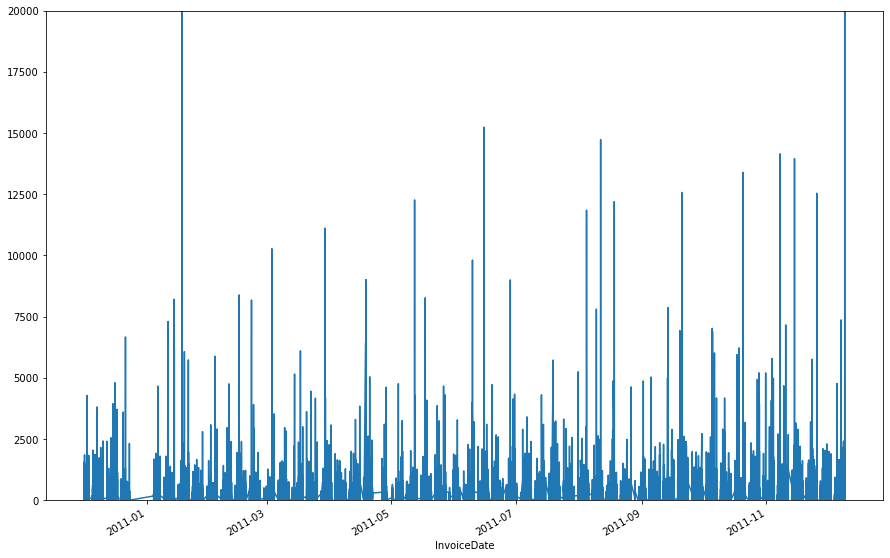

In [94]:
#sales quantity by dates
plt.figure(figsize=(15,10))
data_clean_desc.groupby('InvoiceDate').Quantity.sum().plot()

plt.ylim(0,20000)

In [95]:
# earliest and latest dates
print('Earliest date: ',data_clean_desc.InvoiceDate.min())
print('Latest date: ',data_clean_desc.InvoiceDate.max())

Earliest date:  2010-12-01 08:26:00
Latest date:  2011-12-09 12:50:00


Other visualizations

CPU times: total: 5.94 s
Wall time: 5.95 s


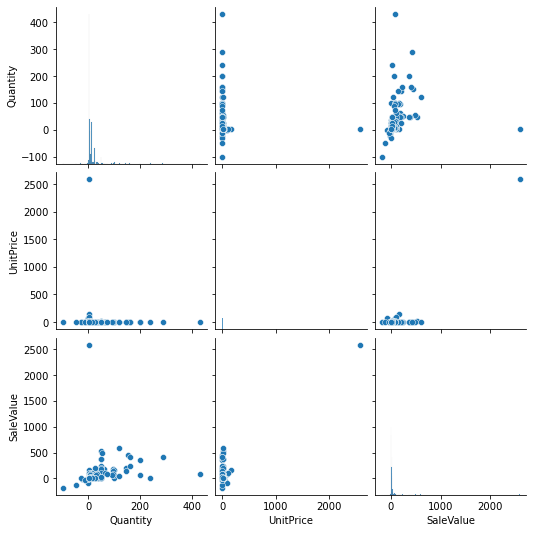

In [96]:
%%time
#view relationships between columns
#i'm doing pairplot on just a subset of the data because it runs for a w
sns.pairplot(data_clean_desc.sample(1000))


(0.0, 100.0)

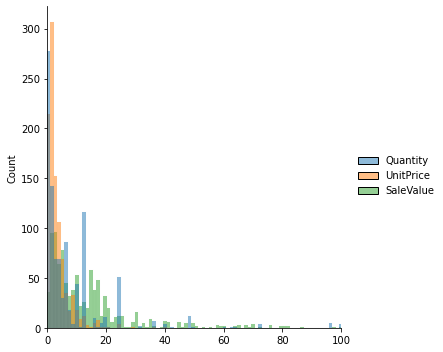

In [97]:
#distplot
sns.displot(data = data_clean_desc.sample(1000))
plt.xlim(0,100) #limit x axis to the section of interest


(-1000.0, 10000.0)

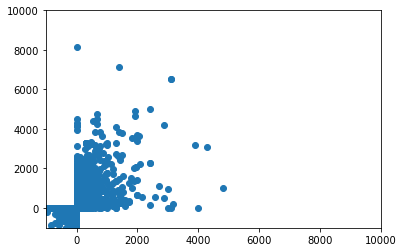

In [98]:
#scatter plot
plt.scatter(data_clean_desc.Quantity, data_clean_desc.SaleValue)
plt.xlim(-1000,10000)
plt.ylim(-1000,10000)

In [99]:
data_clean_desc[data_clean_desc.SaleValue<-20000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098,United Kingdom,-38970.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.6


### Questions for Store Manager

1. What is an invoice number that starts with C?
2. What are sales where quantity is negative?

In [100]:
#TODO: how many returns were recorded in this sales period

data_clean_desc[data_clean_desc.Quantity<0].shape[0]

9762

## Summary

1. UK makes the most sales? get percentage
2. Guest purchases are the most? get percentage. Can we get them to register more? Then make personalized offers?
3. Expand in the other top 10 countries
4. Opportunity? Why are the non-top 10 countries not selling more?


#### Create Interative Plots with Plotly and Cufflinks

In [101]:
# pip install plotly and cufflinks if you don't alredy have them

!pip install plotly
!pip install cufflinks

In [102]:
#import plotly and cufflinks
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [103]:
#initialize plotly. We're planning to use it offline for cases when you're not on the internet
init_notebook_mode(connected=True)
cf.go_offline()

In [104]:
#plot Quantity against sale value
#i'm using a sample of 1000 records so it doesn't run for too long
data_clean_desc.sample(1000).iplot(kind='scatter',x='Quantity', y='SaleValue', mode='markers')

When you hover over points in the chart you'll notice it displays a tool tip containing the value of the point. Plotly can make your charts more interactive.

Hover over the chart and select the zoom tool at the top right to zoom into any part of the chart.


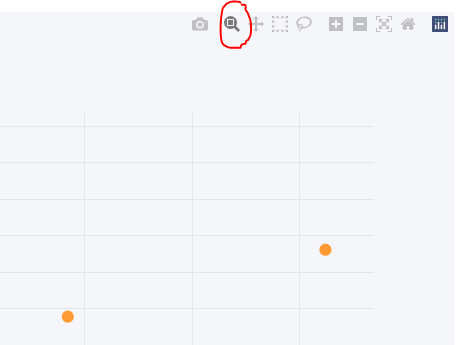


Here's an example:

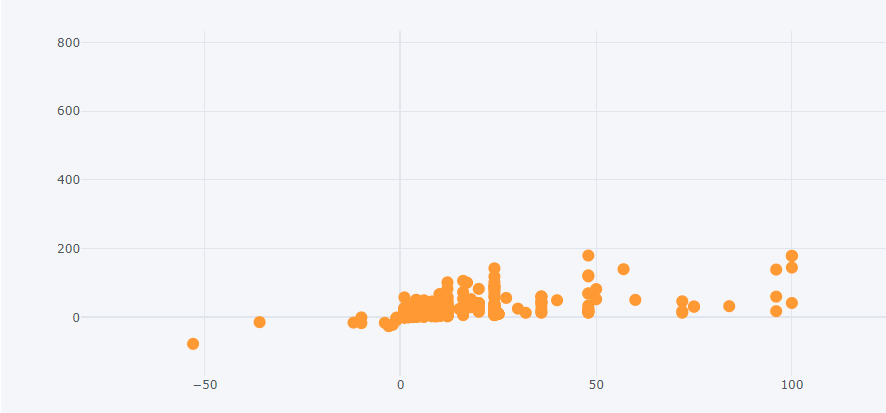

In [105]:
data_clean_desc.Country.value_counts().iplot(kind='bar')

### Bonus: Pandas Profiling

Pandas profiling is a package that allows you to create interactive column by column analysis. It can automate the process of basic EDA for you

In [107]:
!pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=02ff3f7ef4a66002717b2d84da3511588dfd602f53df23a3587e18a08ac7181f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [108]:
pip install markupsafe==2.0.1 --user

Note: you may need to restart the kernel to use updated packages.


In [109]:
import markupsafe

In [110]:
markupsafe.__version__

'2.0.1'

In [114]:
from pandas_profiling import ProfileReport

In [115]:
#create profile report
ProfileReport(data_clean_desc)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [116]:
#save profile report to interactive html page
ProfileReport(data_clean_desc).to_file('interactive_profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning:

overflow encountered in longlong_scalars



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]